<a href="https://colab.research.google.com/github/victorshen2018/TED-AI-HW1/blob/main/Ted_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gdrive


In [1]:
# Uninstall the incompatible version of pyarrow
!pip uninstall -y pyarrow

# Install the correct version of pyarrow (14.0.1 in this case)
!pip install pyarrow==14.0.1

# Reinstall cudf-cu12 and ibis-framework, if necessary, to resolve any further conflicts
!pip install cudf-cu12
!pip install ibis-framework

# Verify the installed versions
!pip show pyarrow cudf-cu12 ibis-framework

Found existing installation: pyarrow 14.0.1
Uninstalling pyarrow-14.0.1:
  Successfully uninstalled pyarrow-14.0.1
  Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (38.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.0.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.1 which is incompatible.
Name: pyarrow
Version: 14.0.1
Summary: Python library for Apache Arrow
Home-page: https://arrow.apache.org/
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: bigframes, bigquery-magics, cudf-cu12, datasets, db-dtypes, ibis-framework, pandas-gbq, tensorflow-datasets
---
Name: cudf-cu12
Version: 24.4.1
Summary: cuDF - GPU Dataframe
Home-page: https://github.com/rapi

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *


In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '5da95a5e3c7949029d7cf5dd2b79331d')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [19]:
# prompt: give me the code to see what ims is holding

print(ims)


['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg', 'http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg', 'https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg', 'https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg', 'https://images.pexels.com/photos/162340/bear-bavarian-bear-wild-brown-bear-162340.jpeg?cs=srgb&dl=animal-bear-cute-162340.jpg&fm=jpg', 'https://canadiangeographic.ca/wp-content/uploads/2022/08/36211246-Grizzly_Bear_Siblings-scaled.jpg', 'https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg', 'https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufo

In [18]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

146

In [20]:
#hide
ims = ['https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg']

In [21]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

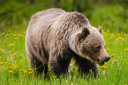

In [22]:
im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [13]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [14]:
fns = get_image_files(path)
fns

(#402) [Path('bears/black/22d34cbc-2f83-47cd-91e3-4c738a48015e.jpg'),Path('bears/black/849a260b-97c3-4030-9458-9b323648e803.jpg'),Path('bears/black/287c9b09-0075-42de-ae6f-60687ce36491.jpg'),Path('bears/black/2cfcf3fa-7c27-4704-945c-605d494b630a.jpg'),Path('bears/black/3ab99427-aa3d-461e-ab70-763784784aa8.jpg'),Path('bears/black/b8ac8ac0-16d1-4f9a-ab1d-32c55d225906.jpg'),Path('bears/black/f939f810-cb75-47a0-a497-e4de626fc8af.jpg'),Path('bears/black/fb8bb682-71cb-4b45-affa-cf76eb540645.jpg'),Path('bears/black/46964bc8-050d-4863-9f3f-3495756faeb9.jpg'),Path('bears/black/6c8c55c8-30f3-4d01-b701-551fe3147508.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#18) [Path('bears/black/db36fa93-82ca-4f5d-a4a1-5a7e4cbdc2c4.jpg'),Path('bears/black/ad7f045f-e618-4ee7-9609-3f7503512582.jpg'),Path('bears/black/8b0c08e1-702e-45b4-a3e1-2b0a8c313916.jpg'),Path('bears/black/5ef305bb-a6ad-473c-b77c-9f4d9d648cca.JPG'),Path('bears/black/fc2ab269-2557-41fd-8fc8-2491645ee2c6.jpg'),Path('bears/black/310255cb-13ed-4b59-80e1-b43081a4d2e5.jpg'),Path('bears/black/f3c53bdf-3c3c-4a24-b1b2-b40bbc185e80.JPG'),Path('bears/grizzly/90ca652c-8f35-4bf1-9099-16298d6f95d3.jpg'),Path('bears/grizzly/33ba21ee-51a2-46fc-ad59-73860d775da0.jpg'),Path('bears/grizzly/3a76aba5-8e2c-4261-9e10-ffba9829b966.JPG')...]

In [16]:
failed.map(Path.unlink);

In [24]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [25]:
dls = bears.dataloaders(path)

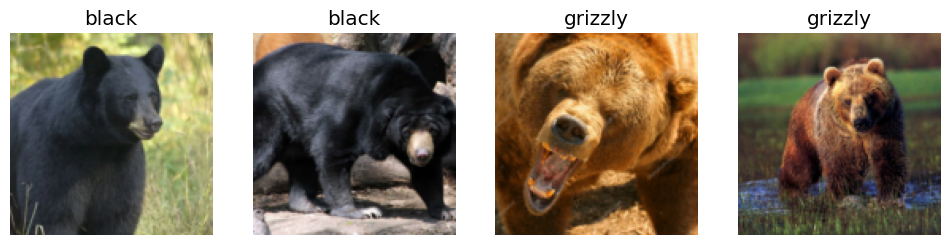

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

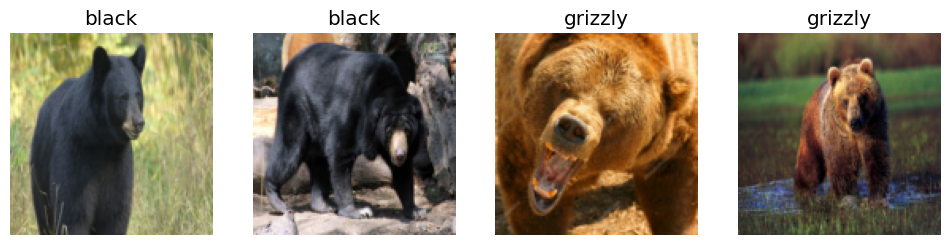

In [27]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

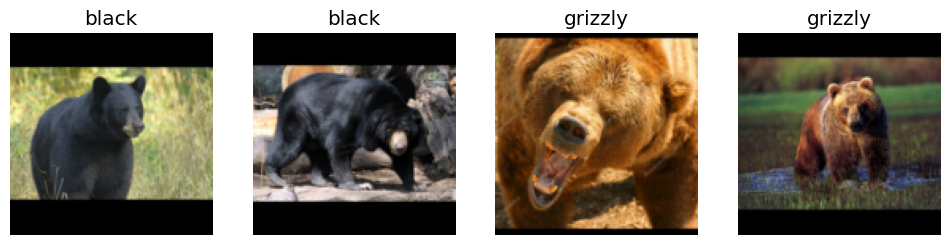

In [28]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

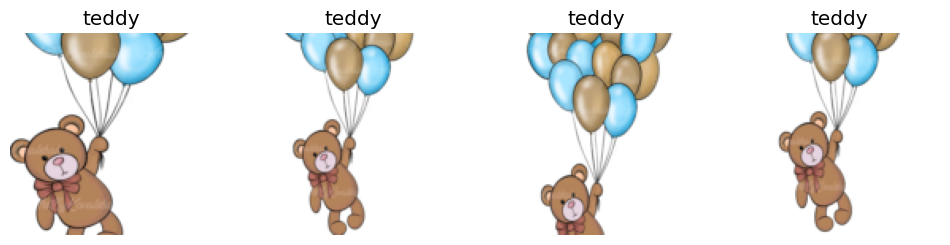

In [29]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

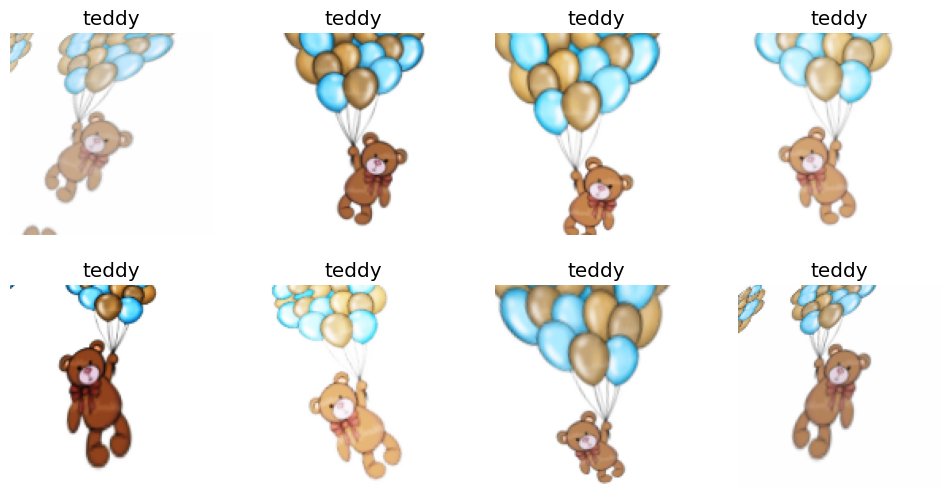

In [30]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [31]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [32]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 35.4MB/s]


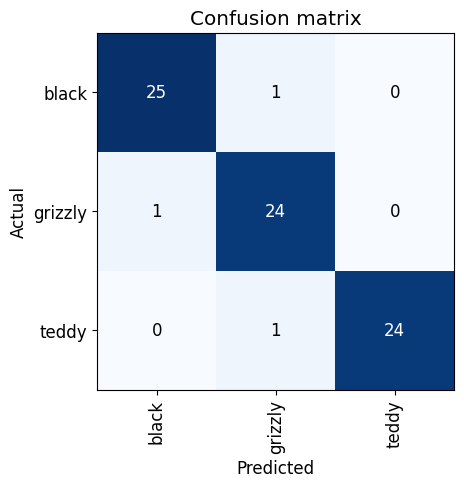

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

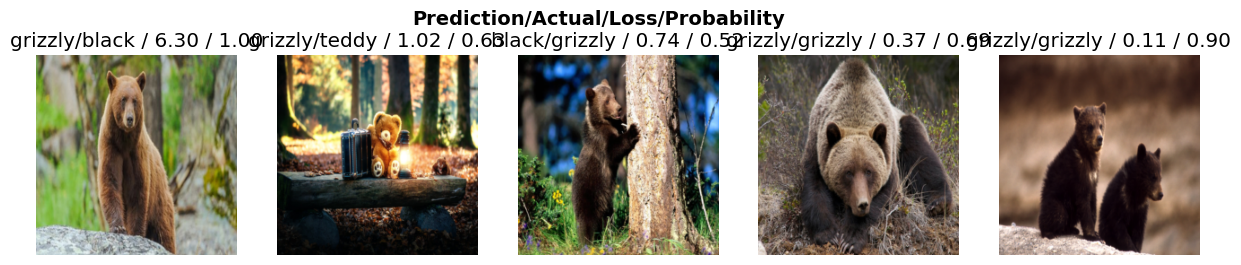

In [34]:
interp.plot_top_losses(5, nrows=1)

In [36]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [37]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [38]:
learn.export()

In [39]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [40]:
learn_inf = load_learner(path/'export.pkl')

In [41]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([8.4355e-03, 9.9153e-01, 2.9942e-05]))

In [42]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [43]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [44]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [48]:
img = PILImage.create(btn_upload.data[-1])

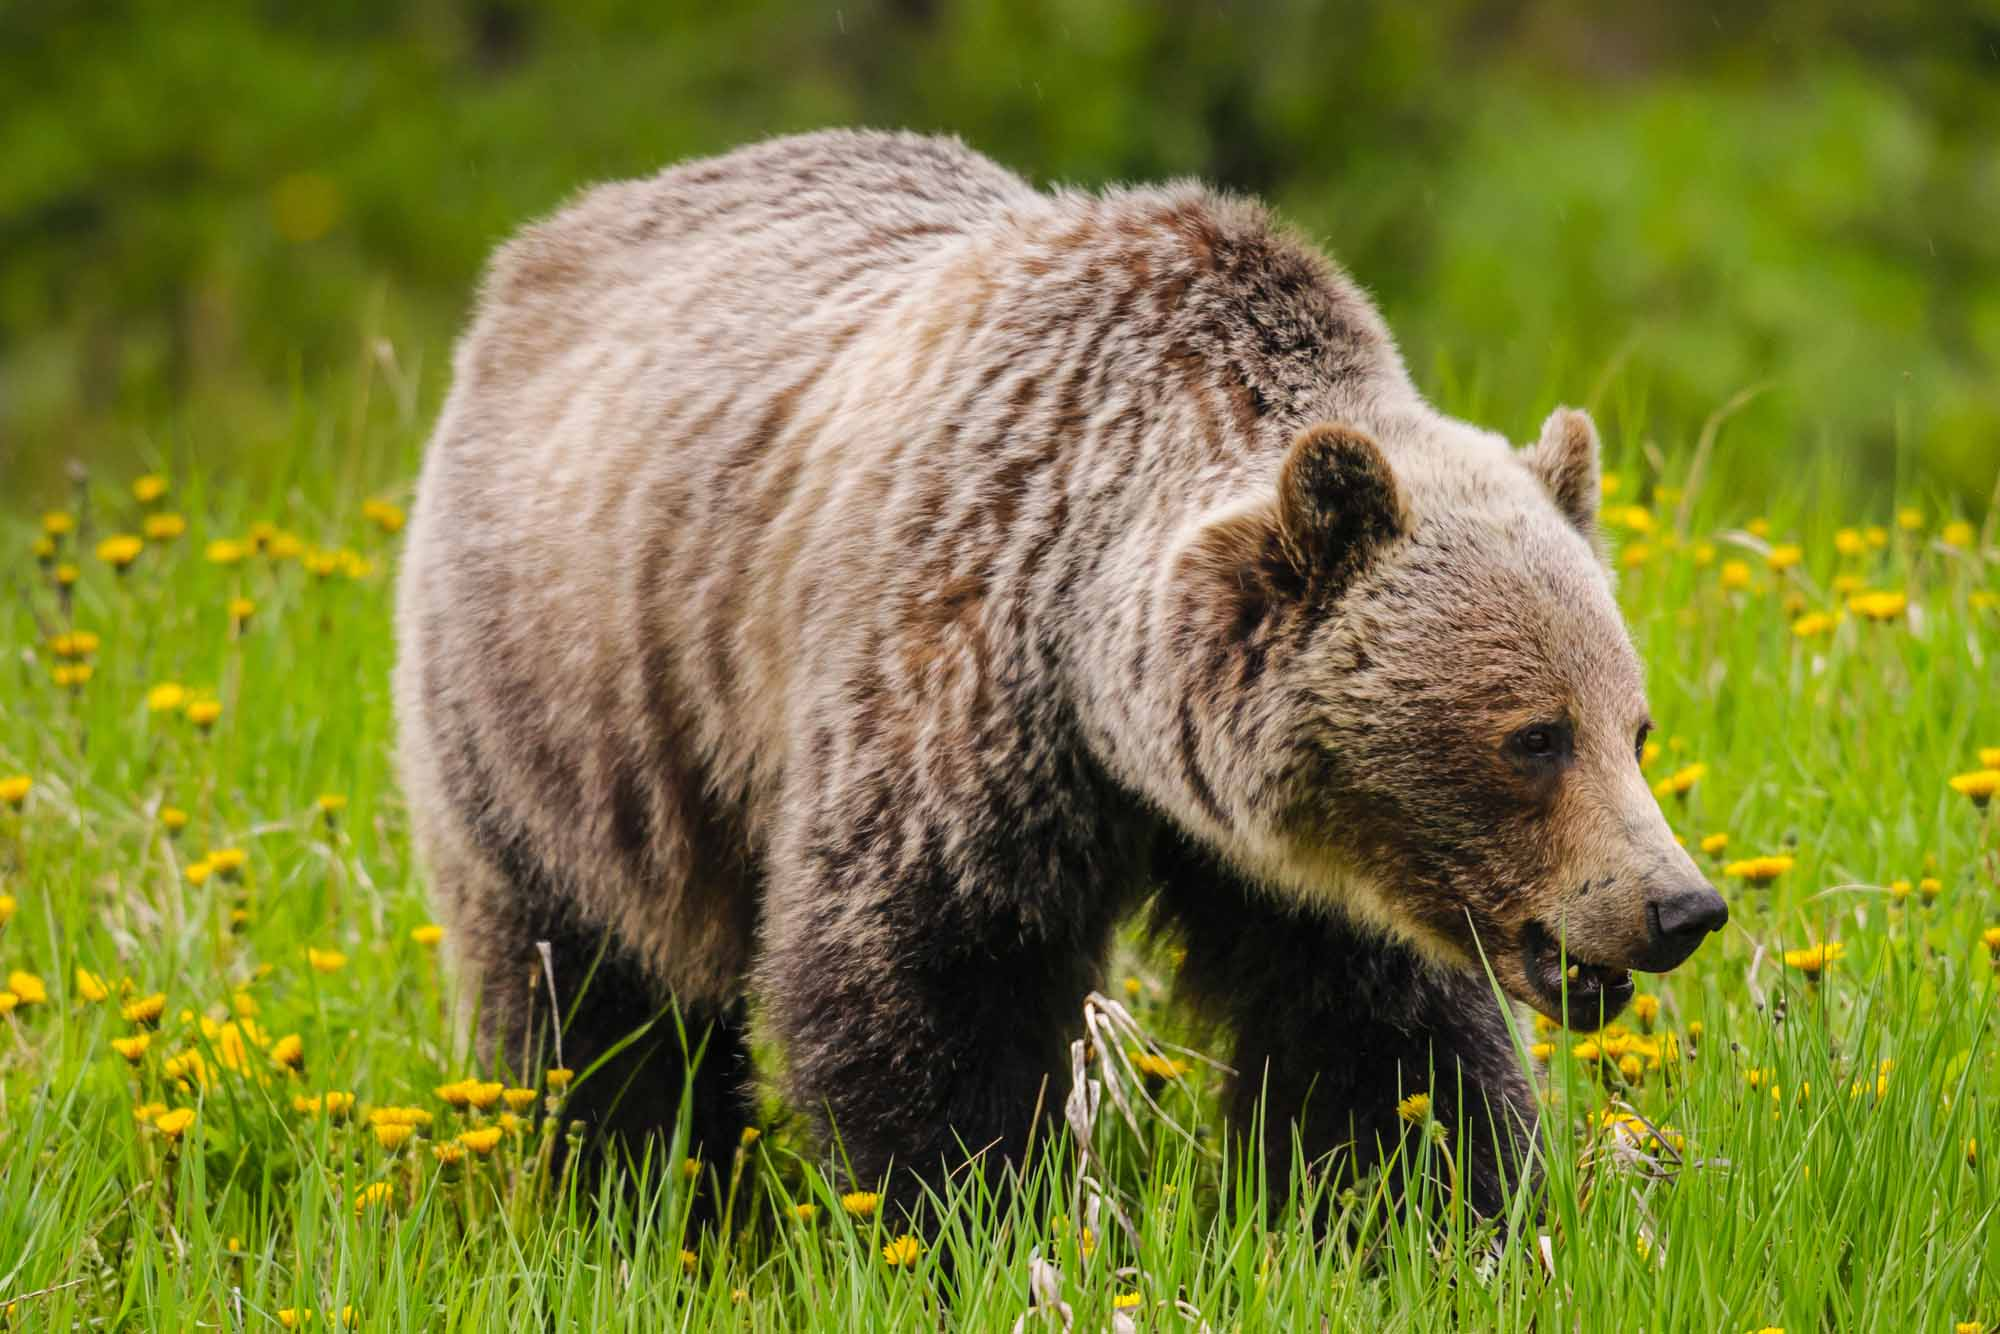

In [51]:
# prompt: code to show what img is holding

display(img)


In [52]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [53]:
pred,pred_idx,probs = learn_inf.predict(img)

In [54]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9915')

In [55]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [56]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [58]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [59]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila